# **CUSTOMER SEGMENTATION FOR AN ONLINE RETAIL STORE**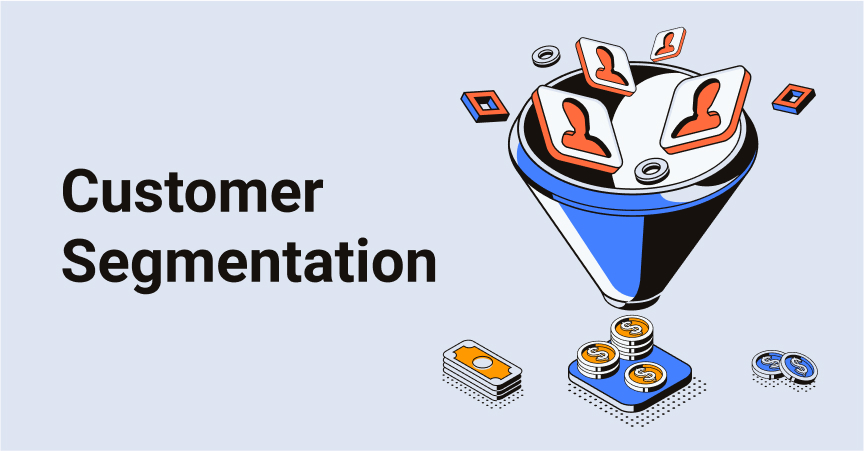

# **Overview**

Customer segmentation is the practice of dividing a company’s customers into groups that reflect similarities among customers in each group. The goal of segmenting customers is to make a decision on the way to relate to customers in each segment so as to maximize the worth of every customer to the business.

In this project, we will use unsupervised machine learning techniques to segment customers of a UK-based and registered, non-store online retail store based on their purchase behavior. The company mainly sells unique all-occasion gift-ware and many customers are wholesalers. We will use the Online Retail dataset which contains all the transactions for the online store between 01/12/2010 and 09/12/2011. 

# **Problem Statement**

Our project's aim is to assist the online retail store understand it's customers' segments based on purchase behavior and assist the company in predicting the right group of new customers for their advertising campaigns.


# **1. Defining the Question**

### **1.1. Specifying the Question**

Which types of customer segments do we have based on customers' purchase behavior?

### **1.2. Defining the Metric for Success**

This research will be considered successful when we will be able to come up with clusters that are easily understandable and interpretable for the business based on customers' purchase behavior.

### **1.3. Research Objectives**

#### **Main Objective**

To segment customers into different clusters based on purchase behavior so that the company can target its customers efficiently.


#### **Specific Objectives**

1. To find the relationship between country and item mostly purchased
2. To identify the country with the highest sales
3. To identify the time, day of the week and month with the highest sales
4. To identify the most popular products
5. To identify customers who frequently make purchases on the online retail store

### **1.4. Recording the Experimental Design**

* Defining the research question
* Load data and preview preliminary characteristics of the dataset
* Data validation
* Finding and dealing with outliers, anomalies, and missing data within the dataset
* Perform exploratory data analysis 
* Implement the solution
* Conclusion
* Recommendations 

### **1.5. Relevance of the data**

This dataset is relevant in our research of identifying and segmenting customers based on their purchase behaviour. It includes variables such as total cost of each transaction, the quantity of items purchased, the date and time of the transaction, the customer ID and the country of customer's residence.

# **2. Reading and checking the data**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.pipeline import make_pipeline
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


In [7]:
# Loading our dataset from an excel file
data = pd.read_excel('/content/drive/MyDrive/Data/Online Retail.xlsx')

In [8]:
# Displaying the top of our dataset
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
# Displaying the bottom of our dataset
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [10]:
# Checking the shape of the dataset
data.shape

(541909, 8)

**Observations**
> The dataset has 541909 rows and 8 columns.

In [11]:
# Checking the info of our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**Observations**
> From the output, the dataset has some null values on the description and customerID columns. All other columns do not have any null values. The CustomerID column does not have the appropriate datatype while all other columns have the appropriate datatype.

In [12]:
# Checking the columns
list(data)

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [13]:
# Check for unique 

### **2.1. Explaining the Columns**
1. InvoiceNo: Invoice number - A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
2. StockCode: Product (item) code -A 5-digit integral number uniquely assigned to each distinct product.
3. Description: Product (item) name.
4. Quantity: The quantities of each product (item) per transaction.
5. InvoiceDate: Invoice date and time - The day and time when a transaction was generated.
6. UnitPrice: Unit price - Product price per unit in sterling (Â£).
7. CustomerID: Customer number - A 5-digit integral number uniquely assigned to each customer.
8. Country: Country name - The name of the country where a customer resides

# **3. External Data Source Validation**

Dr. Daqing Chen, Course Director: MSc Data Science. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK. [dataset link](https://archive.ics.uci.edu/ml/datasets/Online+Retail)

# **4. Data Cleaning**

### **4.1. Checking for duplicates**

In [14]:
# Checking if we have duplicates in the dataset
data.duplicated().sum()

5268

**Observations**
> There are a total of 5268 duplicated values in the dataset.

### **4.2. Dropping the duplicates**

In [15]:
# Dropping the duplicated values in the dataset
data.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


**Observations**
> After dropping the duplicated values, the dataset has 536641 rows and 8 columns.

### **4.3. Checking missing values**

In [16]:
# Checking the total number of missing values
print(data.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


**Observations**
> Our dataset has a total of 1454 missing values in the description column and 135080 in the Customerid column.

### **4.4. Removing missing values**

In [17]:
# We will drop the missing values from our dataset and assign the new dataset the variable data1
data1 = data.dropna()
data1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


**Observations**
> The new dataframe has 406829 rows and 8 columns

In [18]:
# Checking if there are any missing values in the new dataframe
data1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**Observations**
> All the missing values have been dropped.

### **4.5. Removing cancelled invoice numbers**

In [19]:
# Removing Invoices starting with "C" as they represent cancelled purchases
data1= data1.loc[data1['InvoiceNo'].str[0] != 'C']
data1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


**Observations**
> After removing the canceled invoice numbers, the new dataframe has 397924 rows and 8 columns

### **4.6. Creating Additional Columns**

In [20]:
# We will create a new feature for the total cost of each transaction
data1.loc[:, 'TotalCost'] = data1.loc[:, 'Quantity'] * data1.loc[:, 'UnitPrice']

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [21]:
# We will also create another new feature for the month of each transaction
data1.loc[:, 'InvoiceDate'] = pd.to_datetime(data1.loc[:, 'InvoiceDate'])
data1.loc[:, 'Month'] = data1.loc[:, 'InvoiceDate'].dt.month
data1

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12


### **4.7. Checking for Outliers**

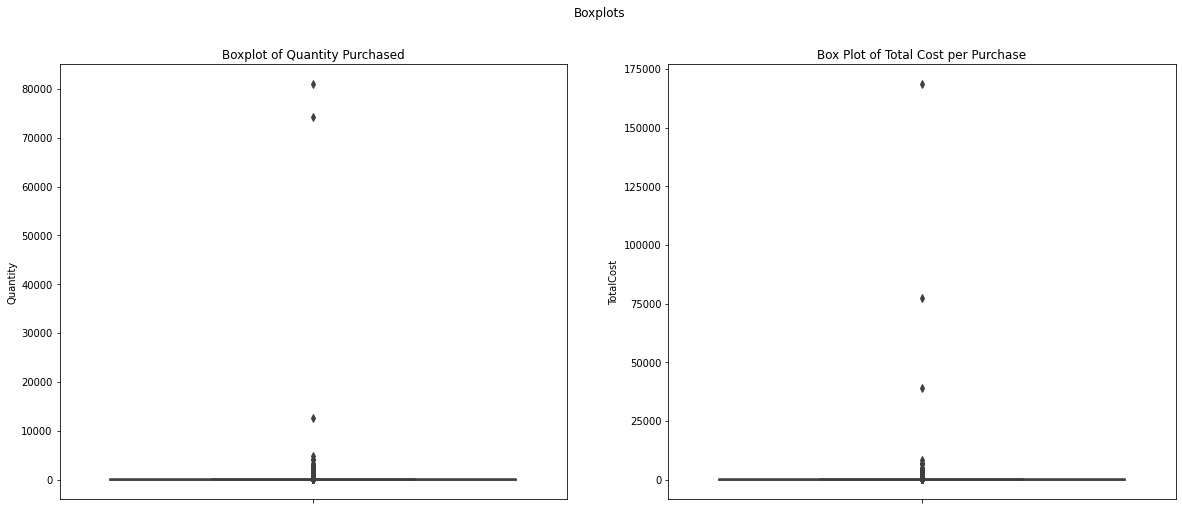

In [22]:
# We will check for outliers in the Quantity and TotalCost variables
#
fig, ax = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('Boxplots')
sns.boxplot(data=data1, y = 'Quantity', ax=ax[0])
ax[0].set_title('Boxplot of Quantity Purchased')
sns.boxplot(data=data1, y = 'TotalCost', ax=ax[1])
ax[1].set_title('Box Plot of Total Cost per Purchase')
plt.show()

**Observations**
> The output of the boxplots show that there are outliers. We will go ahead and check how many records of outliers we have.

In [23]:
# We will calculate the IQR for our 2 variables of interest in order to check  
# for anomalies
# IQR for Quantity
q1_q = data1['Quantity'].quantile(0.25)
q3_q = data1['Quantity'].quantile(0.75)

iqr_q = q3_q - q1_q
print(iqr_q)

# IQR for Total Cost per purchase
q1_tc = data1['TotalCost'].quantile(0.25)
q3_tc = data1['TotalCost'].quantile(0.75)

iqr_tc = q3_tc - q1_tc
print(iqr_tc)


10.0
15.119999999999997


**Observations**
> The output shows that there are 10 and 15.11999 records that are outside the interquatile ranges in the variables, Quantity and TotalCost respectively. This data is useful in our reasearch because it shows customers' purchases and will therefore not be removed.

### **4.8. Checking distinctive values**

In [24]:
# Looking for unique values
data1.nunique() 

InvoiceNo      18536
StockCode       3665
Description     3877
Quantity         302
InvoiceDate    17286
UnitPrice        441
CustomerID      4339
Country           37
TotalCost       2940
Month             12
dtype: int64

# **5. Exploratory Data Analysis**

## **5.1. Univariate Analysis**

#### Descriptive Statistics

In [25]:
# Checking the descriptive statistics of our dataset
data1.describe()

,Quantity,UnitPrice,CustomerID,TotalCost,Month
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171,22.394749,7.612537
std,180.420210,22.096788,1713.169877,309.055588,3.416527
min,1.000000,0.000000,12346.000000,0.000000,1.000000
25%,2.000000,1.250000,13969.000000,4.680000,5.000000
50%,6.000000,1.950000,15159.000000,11.800000,8.000000
75%,12.000000,3.750000,16795.000000,19.800000,11.000000
max,80995.000000,8142.750000,18287.000000,168469.600000,12.000000


**Observations**

> The output of this summary shows the total number of rows, the mean value, the standard deviation of the data, the min and max values of the data, the 25th, 50th and 75th percentile of the data per each column with numerical values.

#### Frequency distribution

In [26]:
# Checking the frequency distribution of the Countries in our dataset
#
data1.Country.value_counts()

United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

**Observations**
> The United Kingdom appears the most number of times while Saudia Arabia has the least number of transactions. 

In [27]:
# Check the number of products, transactions and customers in our dataset
#
pd.DataFrame([{'products': len(data1['StockCode'].value_counts()),    
               'transactions': len(data1['InvoiceNo'].value_counts()),
               'customers': len(data1['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,3665,18536,4339


**Observations**
> We have 3665 products 18536 complete purchases and 4339 unique customers.

#### Bar graphs

We will plot bar graphs for Checking top 10 best sellers .

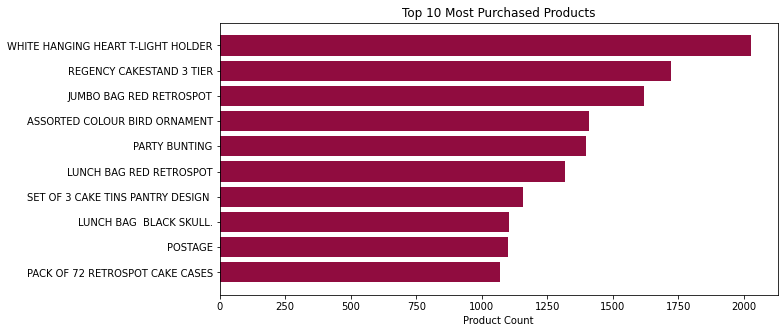

In [28]:
# Checking top 10 best sellers and show the same on a bar graph
#
prod=pd.DataFrame(data1['Description'].value_counts().head(10)).sort_values(by='Description')

plt.figure(figsize = (10,5))
plt.barh(prod.index, prod.Description, color = '#900c3f')
plt.xlabel('Product Count')
plt.title('Top 10 Most Purchased Products');

**Observations**
> White hanging heart-light holder was the highest selling product.

#### Countplot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Monthly Purchases')

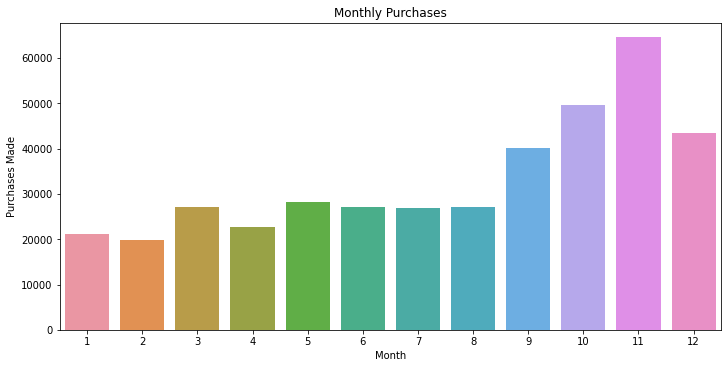

In [29]:
# Countplot of Purchases made per month to check which month has the most 
# purchases
#
fig, ax = plt.subplots(constrained_layout = True, figsize=(10,5))
sns.countplot(data1[['InvoiceNo','InvoiceDate']].InvoiceDate.dt.month)
ax.set_xlabel('Month')
ax.set_ylabel('Purchases Made')
ax.set_title('Monthly Purchases')

**Observations**
> The last 3 months of the year are the most active in terms of product purchase quatities with November leading followed by October

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Weekday Purchases')

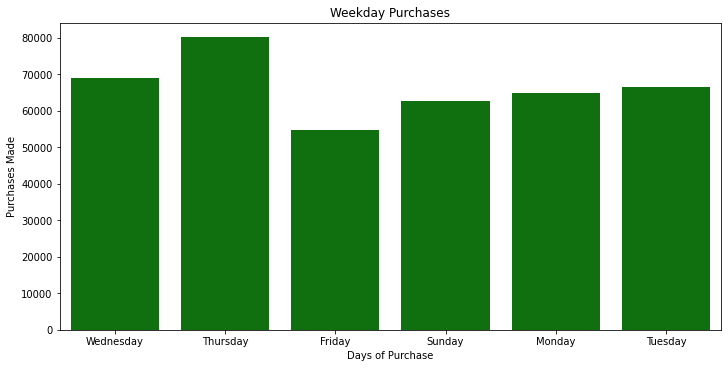

In [30]:
# Countplot of purchases made on weekdays.
#
fig, ax = plt.subplots(constrained_layout = True, figsize=(10,5))
sns.countplot(data1[['InvoiceNo','InvoiceDate']].InvoiceDate.dt.day_name(), color ='g')
ax.set_xlabel('Days of Purchase')
ax.set_ylabel('Purchases Made')
ax.set_title('Weekday Purchases')

**Observations**

*   Thursday had the highest purchase orders made while Friday the least
*   Strangely, there are no purchases made on Saturday. 



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Hourly Purchases')

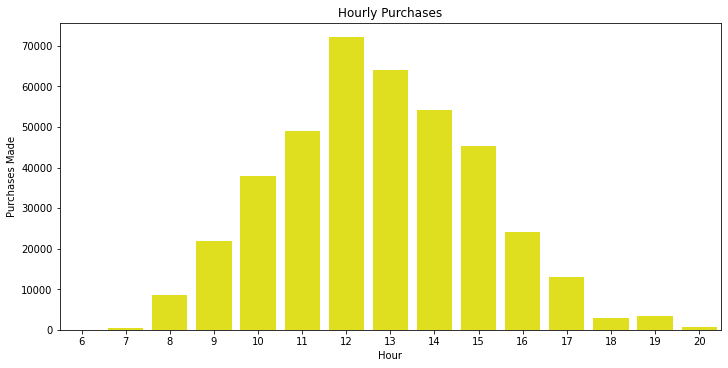

In [31]:
# Countplot of purchases made hourly

fig, ax = plt.subplots(constrained_layout = True, figsize=(10,5))
sns.countplot(data1[['InvoiceNo','InvoiceDate']].InvoiceDate.dt.hour, color ='yellow')
ax.set_xlabel('Hour')
ax.set_ylabel('Purchases Made')
ax.set_title('Hourly Purchases')

**Observations**
> Most orders were made between 0900hrs - 1600hrs. No purchases are made past 8.00 pm until 6.00am

#### Distribution plot

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Daily Purchases')

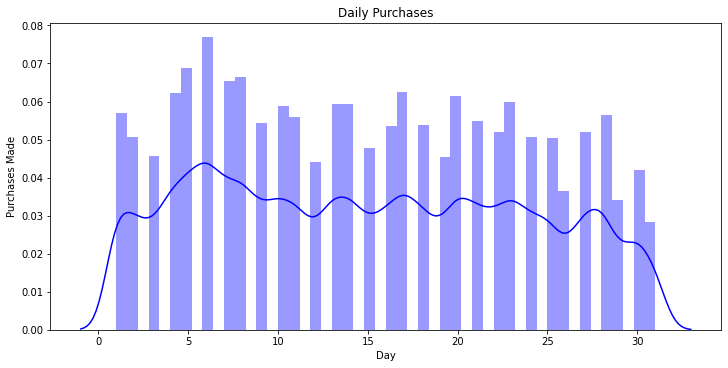

In [32]:
# We will plot a distribution plot of daily purchases.
# 
fig, ax = plt.subplots(constrained_layout = True, figsize=(10,5))
sns.distplot(data1[['InvoiceNo','InvoiceDate']].InvoiceDate.dt.day, color ='blue')
ax.set_xlabel('Day')
ax.set_ylabel('Purchases Made')
ax.set_title('Daily Purchases')

**Observations**
> The purchases are almost evenly distriuted across the days in a month.

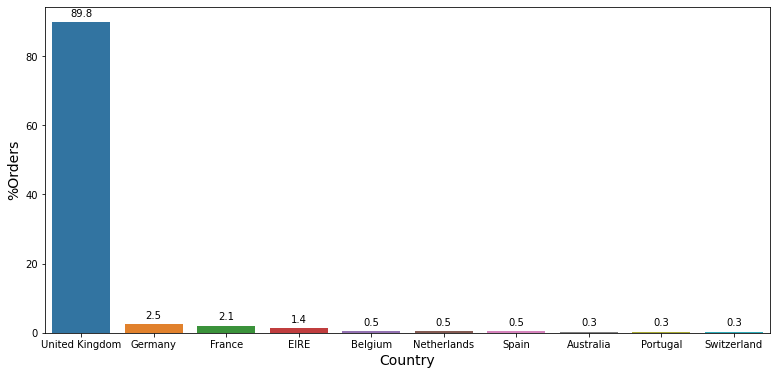

In [33]:
# Distribution of purchases in the top ten countries
#
temp = data1.groupby(['Country'],as_index=False).agg({'InvoiceNo':'nunique'}).rename(columns = {'InvoiceNo':'Orders'})
total = temp['Orders'].sum(axis=0)
temp['%Orders'] = round((temp['Orders']/total)*100,4)

temp.sort_values(by=['%Orders'],ascending=False,inplace=True)
temp.reset_index(drop=True,inplace=True)

plt.figure(figsize=(13,6))
splot=sns.barplot(x="Country",y='%Orders',data=temp[:10])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Country", size=14)
plt.ylabel("%Orders", size=14)
plt.show()


**Observations**
> The UK dominates the top 10 countries with 89.8% of product purchases. The top 3 markets are the UK, Germany and France.

#### Histogram

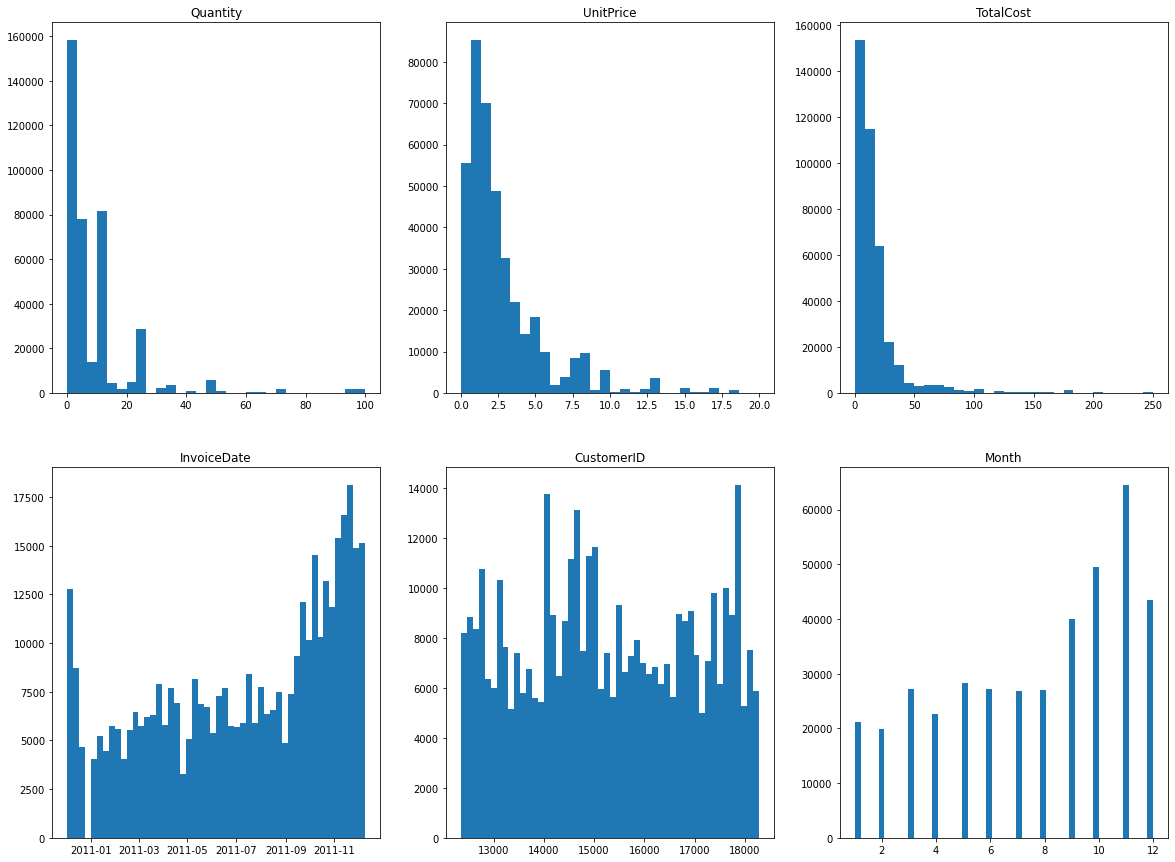

In [44]:
fig, axs = plt.subplots(2, 3, figsize=(20, 15))
axs[0, 0].hist(data1['Quantity'], bins=30, range=(0, 100))
axs[0, 0].set_title('Quantity')
axs[0, 1].hist(data1['UnitPrice'], bins=30, range=(0, 20))
axs[0, 1].set_title('UnitPrice')
axs[0, 2].hist(data1['TotalCost'], bins=30, range=(0, 250))
axs[0, 2].set_title('TotalCost')
axs[1, 0].hist(data1['InvoiceDate'], bins=50)
axs[1, 0].set_title('InvoiceDate')
axs[1, 1].hist(data1['CustomerID'], bins=50)
axs[1, 1].set_title('CustomerID')
axs[1, 2].hist(data1['Month'], bins=50)
axs[1, 2].set_title('Month')
plt.show()


**Observations**
> The histograms show that most of the data is skewed to the left, indicating that the majority of the purchases are low-value transactions. 

We grouped the dataframe by country and sum the total sales for each country in both 2010 and 2011. We then find the country with the highest sales in 2010 and 2011 using the idxmax() function and print out the results.

In [ ]:
# group by country and sum total sales in 2010 and 2011
sales_by_country_2010 = data1[data1['InvoiceDate'].dt.year == 2010].groupby(['Country'])['TotalCost'].sum()
sales_by_country_2011 = data1[data1['InvoiceDate'].dt.year == 2011].groupby(['Country'])['TotalCost'].sum()

# find the country with the highest sales in 2010
highest_sales_2010 = sales_by_country_2010.idxmax()
print(f"Country with highest sales in 2010: {highest_sales_2010}")

# find the country with the highest sales in 2011
highest_sales_2011 = sales_by_country_2011.idxmax()
print(f"Country with highest sales in 2011: {highest_sales_2011}")


Country with highest sales in 2010: United Kingdom
Country with highest sales in 2011: United Kingdom


**Observations**
> Country with highest sales in 2010 and 2011 is the United Kingdom.



We grouped the data by product description and summed the quantity of each product, resulting in a new dataframe that shows the total quantity of each product sold. We then sorted this dataframe by the quantity in descending order and printed the top 10 most popular products by quantity sold.

In [ ]:
# group by product and sum the quantity
product_popularity = data1.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

# print the top 10 most popular products
print(product_popularity.head(10))


Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


**Observations**
> PAPER CRAFT , LITTLE BIRDIE is the most popular product.

## **5.2. Bivariate Analysis** 

#### Boxplot

We then plotted boxplots for the various features

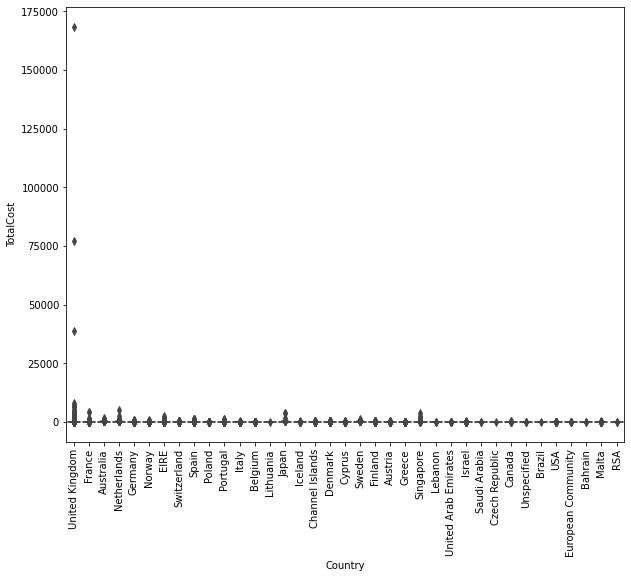

In [ ]:
# box plots
sns.boxplot(data=data1, x='Country', y='TotalCost')
plt.xticks(rotation=90)
plt.show()

**Observations**
> The box plot shows that countries such as France, Germany, and Spain have relatively lower total costs compared to the United Kingdom. The United Kingdom has the highest total costs, which could indicate that it is the country with the most sales and/or the highest average purchase value. The box plot also shows that the spread of total costs is greater for the United Kingdom compared to other countries. The presence of outliers in the box plot indicates that there are some very high total cost transactions for certain countries.

#### Heatmap

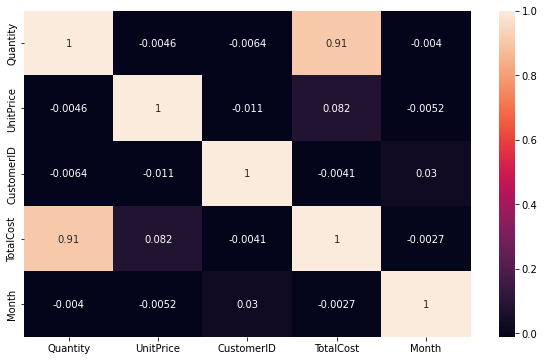

In [ ]:
# Heatmap for visualizing the strength and direction of the relationship between 
# different variables in the dataset.
#
plt.figure(figsize=(10,6))
corr = data1.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

**Observations**
> There is a strong correlation between Quantity and TotalCost. This strong positive correlation (0.91) between the two variables, indicate that as the quantity of items purchased increases, the total cost of the purchase also increases.

We grouped the data by the "Country" and "Description" columns and summed the quantity of each item. We then sorted the data by the quantity of each item and got the top item for each country. Finally, we used the seaborn library to create a bar plot that shows the relationship between country and the item mostly purchased.

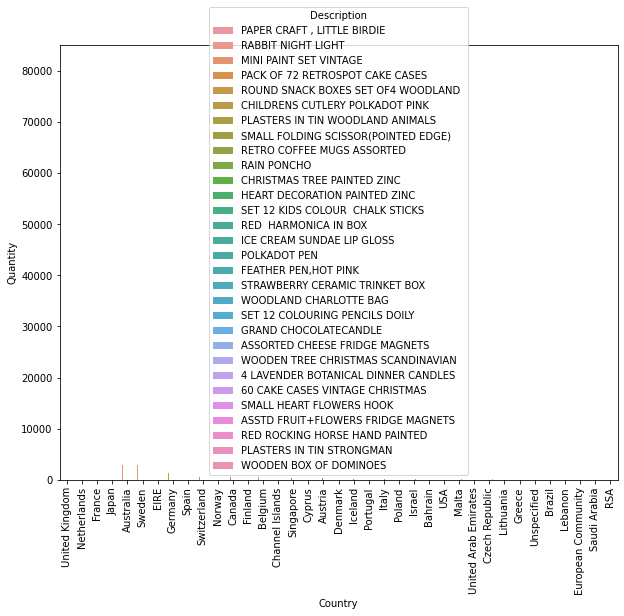

In [ ]:
# group data by country and item description
grouped = data1.groupby(['Country', 'Description'])['Quantity'].sum().reset_index()

# sort by quantity and get the top item for each country
grouped = grouped.sort_values('Quantity', ascending=False).groupby('Country').head(1)

# plot the results
sns.barplot(x='Country', y='Quantity', hue='Description', data=grouped)
plt.xticks(rotation=90)
plt.show()

## **5.3. Multivariate Analysis**

#### Scatterplot

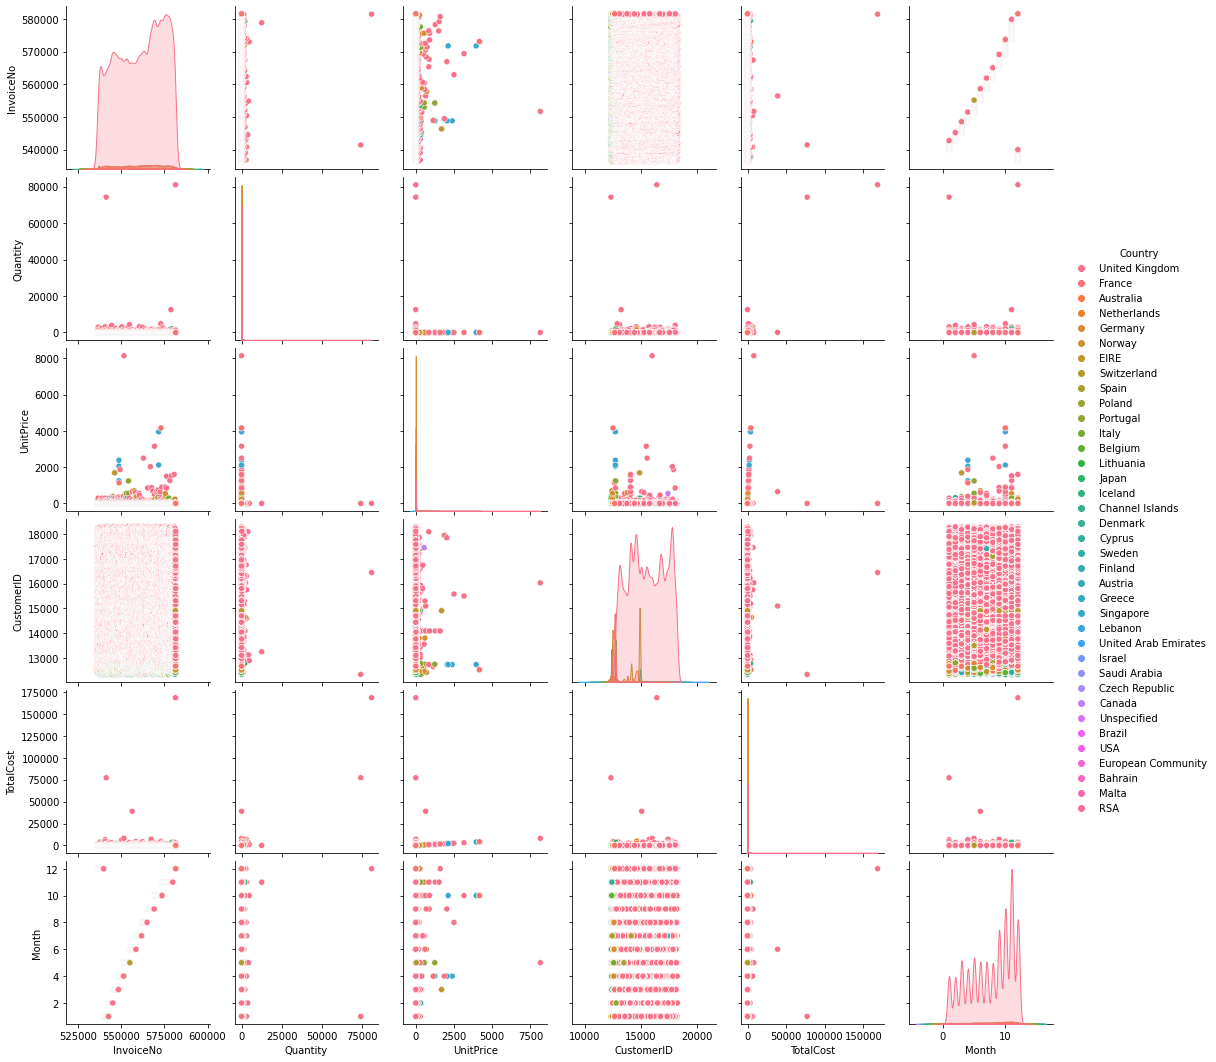

In [ ]:
# Pairplot to visualize the distribution of the data and relationships between variables
#
sns.pairplot(data1, hue='Country')
plt.show()

**Observations**
> We observed that the distribution of total cost for customers from the United Kingdom appears to be more spread out than for customers from France, as seen in the scatter plots on the diagonal. Additionally, one could observe a positive correlation between quantity and total cost for customers from Germany, as seen in the scatter plot between those two variables.From the pairplot, we can observe that the distribution of TotalCost for different countries is different.

#**6. Implementing the Solution**


## **6.1. RFM Metrics**
###**Creating a new dataframe "rfm" for kmeans cluster and segment analysis.**
We are going to analyse the Customers based on below 3 factors:
* R (Recency): Number of days since last purchase
* F (Frequency): Number of transactions
* M (Monetary): Total amount of transactions (TotalCost)

In [ ]:
rfm_m = data1.groupby('CustomerID')['TotalCost'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,TotalCost
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
# New Attribute : Frequency

rfm_f = data1.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [ ]:
# Merging the two dfs

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,TotalCost,Frequency
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [ ]:
# New Attribute : Recency

# Convert to datetime to proper datatype

data1['InvoiceDate'] = pd.to_datetime(data1['InvoiceDate'],format='%d-%m-%Y %H:%M')

<ipython-input-38-aa3ffc2955cc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['InvoiceDate'] = pd.to_datetime(data1['InvoiceDate'],format='%d-%m-%Y %H:%M')


In [ ]:
# Compute the maximum date to know the last transaction date

max_date = max(data1['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [ ]:
# Compute the difference between max date and transaction date

data1['Diff'] = max_date - data1['InvoiceDate']
data.head()

<ipython-input-40-8183b8a3a62e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Diff'] = max_date - data1['InvoiceDate']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Compute last transaction date to get the recency of customers

rfm_p = data1.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:49:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [ ]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [ ]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'TotalCost', 'Frequency', 'Recency']
rfm.head()

,CustomerID,TotalCost,Frequency,Recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


### **Removing Outliers**

We checked for outliers and plotted their distributions. We then went ahead to remove them

Text(0.5, 0, 'Attributes')

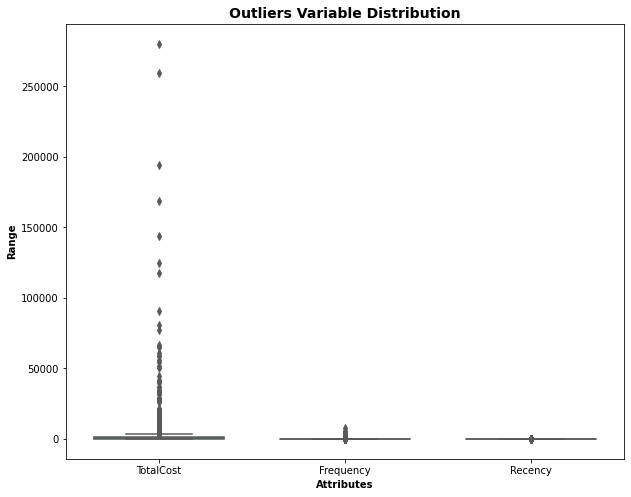

In [ ]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['TotalCost','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [ ]:
# Removing (statistical) outliers for Total Cost
Q1 = rfm.TotalCost.quantile(0.05)
Q3 = rfm.TotalCost.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.TotalCost >= Q1 - 1.5*IQR) & (rfm.TotalCost <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

### **Standardization**

Standardization is needed when we want to protect the weights of each value. In this case it's a must!

In [ ]:
# Rescaling the attributes

rfm_df = rfm[['TotalCost', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4257, 3)

In [ ]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['TotalCost', 'Frequency', 'Recency']
rfm_df_scaled.head()

,TotalCost,Frequency,Recency
0,1.645726,1.067832,-0.917872
1,0.262124,-0.460601,-0.189272
2,0.240269,-0.035474,-0.748198
3,-0.543361,-0.602310,2.156221
4,0.652411,0.085991,-0.578524


## **6.2 Building the Model**



### **K Means clustering**

In [ ]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [ ]:
kmeans.labels_

array([3, 0, 0, ..., 1, 0, 0], dtype=int32)

Finding the Optimal Number of Clusters using The Elbow Method

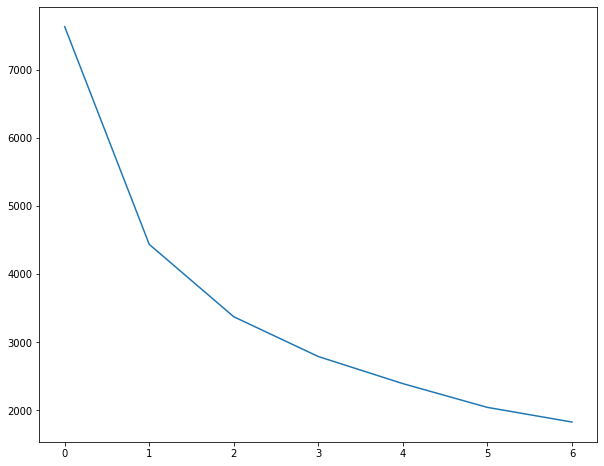

In [ ]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

The drastic change at some point shows the best number of clusters. That's why curve at the 3 clusters shows the elbow like shape hence Optimal number of clusters is 3.

### **Cluster validation using Silhouette analysis**

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [ ]:
# Silhouette analysis
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.540625413768531
For n_clusters=3, the silhouette score is 0.5087756865796796
For n_clusters=4, the silhouette score is 0.4832658274389109
For n_clusters=5, the silhouette score is 0.466959091745774
For n_clusters=6, the silhouette score is 0.4161883624470896
For n_clusters=7, the silhouette score is 0.413435373101441
For n_clusters=8, the silhouette score is 0.3937054333174142


At cluster 3 we have a the silhouette score as 0.508 which is statistically sound hence we confirm the validity of using the 3 clusters chosen

### **Modeling**

In [ ]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [ ]:
kmeans.labels_

array([2, 1, 1, ..., 0, 1, 1], dtype=int32)

In [ ]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,TotalCost,Frequency,Recency,Cluster_Id
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,0
5,12352.0,2506.04,85,35,1


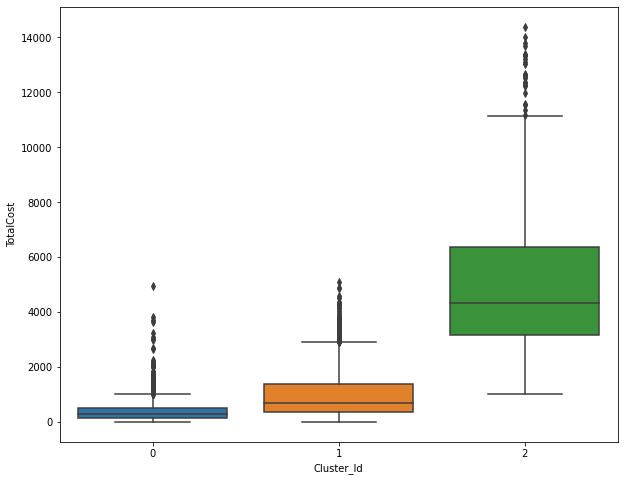

In [ ]:
# Box plot to visualize Cluster Id vs Total amount spent

sns.boxplot(x='Cluster_Id', y='TotalCost', data=rfm)

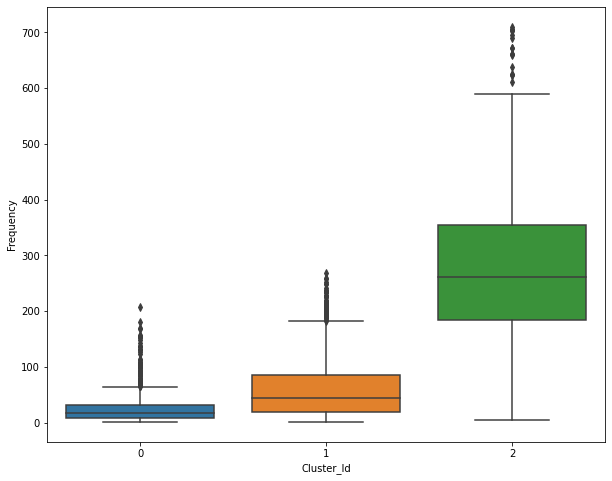

In [ ]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

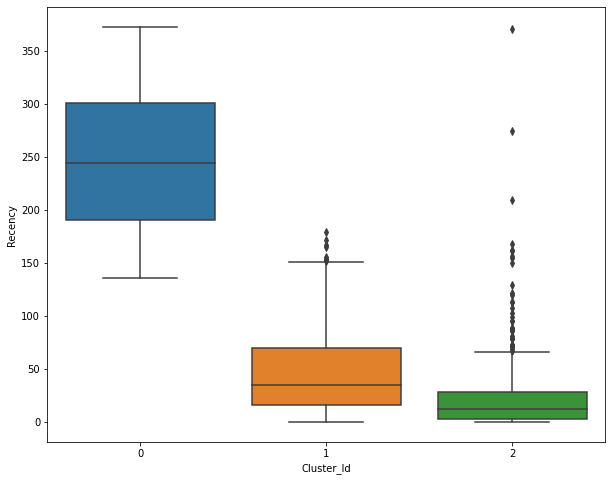

In [ ]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

### **Evaluating model performance**

We use the Calinski-Harabasz Score & Davies-Bouldin index to validate the silhouette score results from earlier and confirm statistical integrity of the model.

In [ ]:
# Calinski-Harabasz Score
from sklearn.metrics import calinski_harabasz_score
print("Calinski-Harabasz Score:", calinski_harabasz_score(rfm_df_scaled, cluster_labels))

Calinski-Harabasz Score: 3617.4627243539812


In [ ]:
# Davies-Bouldin index
from sklearn.metrics import davies_bouldin_score
print("Davies-Bouldin Score:",davies_bouldin_score(rfm_df_scaled, cluster_labels))

Davies-Bouldin Score: 0.9019462477753233


From the high Calinski-Harabasz Score: 3617.4627243539812 and the low Davies-Bouldin Score: 0.9019462477753233 we find the kmeans clustering model application is accurate.

# **7. Conclusions**

Customers with Cluster Id 2 are frequent buyers with high amount of transactions as compared to other customers.

Customers with Cluster Id 2 are the customers with high monetary values(Total Cost) of transactions as compared to other customers.

Customers with Cluster Id 0 are not recent buyers and hence least of importance from business point of view.

The majority of the customers are from the United Kingdom, and the country also has the highest sales. 

The most popular products are those that are priced at a lower cost.

The data also shows that there are some customers who frequently make purchases on the online retail store.

From the box plot, it is clear that countries like France, Germany and Spain have more outliers in terms of total cost.   

Distribution of Total Cost per product and popularity of products differ from country to country.



# **8. Recommendations**

The company should focus on producing and promoting more affordable products to attract more customers.

The frequent customers should be targeted with personalized marketing campaigns and special offers to encourage them continue making purchases.

Countries like the UK, France, Germany and Spain have more outliers in terms of total cost.This indicates that there are some customers in these countries who make high-value purchases. The company should focus on targeting these customers with high-end products and services.

The company should focus on increasing the average purchase value by promoting high-value products and services.

The company should focus on implementing country-specific strategies to increase sales.

The company should focus on producing more of these popular items for each country and promoting them in the relevant countries.